## Income Prediction Based on Demographic and Socioeconomic Factors

Description: Predict whether income exceeds $50K/yr based on census data.

### Summary

[The dataset](https://data.world/uci/adult) is sourced from the Data World website.


| Metric                                   | Value   | Description                                                                                                     |
|------------------------------------------|---------|-----------------------------------------------------------------------------------------------------------------|
| Accuracy                                 | 0.8524  | The overall accuracy of the model is approximately 85.24%. It indicates the proportion of correctly classified instances. A higher value suggests better performance. |
| Precision (<=50K)                        | 0.88    | The precision for instances labeled as <=50K is 0.88. Precision represents the proportion of true positive predictions over the total predicted instances for that class. |
| Recall (<=50K)                           | 0.93    | The recall (sensitivity) for instances labeled as <=50K is 0.93. Recall represents the proportion of true positive predictions over the total actual instances of that class. |
| F1-Score (<=50K)                         | 0.90    | The F1-score for instances labeled as <=50K is 0.90. The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. |
| Precision (>50K)                         | 0.73    | The precision for instances labeled as >50K is 0.73. This means that the model is correct about 73% of the time when predicting >50K. |
| Recall (>50K)                            | 0.63    | The recall (sensitivity) for instances labeled as >50K is 0.63. The model identifies about 63% of the actual >50K instances in the dataset. |
| F1-Score (>50K)                          | 0.68    | The F1-score for instances labeled as >50K is 0.68. The F1-score takes into account both precision and recall for a class. |
| Macro-Average F1-Score                   | 0.79    | The macro-average F1-score considers both classes equally and is 0.79. It provides an overall measure of the model's performance without considering class imbalance. |
| Weighted-Average F1-Score                | 0.85    | The weighted-average F1-score is 0.85, considering class proportions in the test set. It indicates the F1-score when each class is weighted by the number of instances. |
| Confusion Matrix (<=50K True Positives)  | 4549    | There were 4549 instances correctly predicted as <=50K (true positives). |
| Confusion Matrix (<=50K False Positives) | 363     | There were 363 instances incorrectly predicted as >50K when they actually belong to <=50K (false positives). |
| Confusion Matrix (<=50K False Negatives) | 598     | There were 598 instances incorrectly predicted as <=50K when they actually belong to >50K (false negatives). |
| Confusion Matrix (>50K True Positives)   | 1002    | There were 1002 instances correctly predicted as >50K (true positives). |
| Support (<=50K)                          | 4912    | There are 4912 instances labeled as <=50K in the test set. The support represents the number of instances in each class. |
| Support (>50K)                           | 1600    | There are 1600 instances labeled as >50K in the test set. The support represents the number of instances in each class. |


### Importing Libraries

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from pycaret.classification import setup, compare_models, pull, save_model

### Read Dataset

In [23]:
# Read csv data
df = pd.read_csv("assets/input/adult.data.csv")

### Data Cleaning

In [24]:
# List of column names in the 'columns_list' variable
columns_list = ["age", "workclass", "final_weight", "education", "education_num",
                "marital_status", "occupation", "relationship", "race", "sex",
                "capital_gain", "capital_loss", "hours_per_week", "native_country", "income_flag"]

# Assign column names to the DataFrame
df.columns = columns_list

### Data Profiling

In [25]:
# Checking Nan values
df.isnull().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_flag       0
dtype: int64

### Update Dataset

In [26]:
# Updated data
df.to_csv("assets/output/adult.updated.data.csv")

### Classification Models

#### Random Forest Classifier with Scikit-learn

In [27]:
# Split the data into features (X) and the target variable (y)
X = df.drop("income_flag", axis=1)
y = df["income_flag"]

# Convert categorical variables into numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=26)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=26, verbose=0, warm_start=False)

In [28]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8513513513513513
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4912
        >50K       0.73      0.62      0.67      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.85      0.85      6512

Confusion Matrix:
[[4544  368]
 [ 600 1000]]


In [29]:
# Test data
test_data = {
    'age': 26,
    'workclass': 'Private',
    'fnlwgt': 220000,
    'education': 'Bachelors',
    'education-num': 13,
    'marital-status': 'Never-married',
    'occupation': 'Exec-managerial',
    'relationship': 'Unmarried',
    'race': 'White',
    'sex': 'Female',
    'capital-gain': 1000,
    'capital-loss': 0,
    'hours-per-week': 40,
    'native-country': 'United-States'
}

# Convert test_data into a DataFrame
test_df = pd.DataFrame([test_data])

# Perform one-hot encoding on categorical variables
# It turns the categorical variables (like workclass, education, etc.) into numerical values 
test_df = pd.get_dummies(test_df)

# Reorder the columns in test_df to match the order in X_train
test_df = test_df.reindex(columns=X.columns, fill_value=0)

# Make predictions using the trained classifier
predicted_income_flag = rf_classifier.predict(test_df)

print("Predicted income_flag:", predicted_income_flag[0])

Predicted income_flag:  <=50K


In [30]:
# Get the feature importances
feature_importances = rf_classifier.feature_importances_

# Get the indices that would sort the importances array in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importances in descending order
print("Feature Importances (sorted):")
for index in sorted_indices:
    print(f"{X.columns[index]}: {feature_importances[index]}")

Feature Importances (sorted):
final_weight: 0.15869161250893546
age: 0.14994870525551138
capital_gain: 0.08989217050517943
hours_per_week: 0.08419702596996338
education_num: 0.06497283981034216
marital_status_ Married-civ-spouse: 0.06032166859796757
relationship_ Husband: 0.0469934847724404
capital_loss: 0.029190669150899188
marital_status_ Never-married: 0.025085614159032207
occupation_ Exec-managerial: 0.017101752742056636
occupation_ Prof-specialty: 0.015393901167747684
education_ Bachelors: 0.011551074101349867
workclass_ Private: 0.010942326848439972
relationship_ Wife: 0.010905235625377811
sex_ Male: 0.009887746466086504
relationship_ Not-in-family: 0.009415809915141243
education_ Masters: 0.008834668454587196
sex_ Female: 0.00879540872152152
workclass_ Self-emp-not-inc: 0.008478988233719502
relationship_ Own-child: 0.008253070829760413
marital_status_ Divorced: 0.008039229775370693
occupation_ Other-service: 0.008006755750143767
education_ HS-grad: 0.007661301399558045
occupatio

#### PyCaret

In [31]:
s = setup(df, target = 'income_flag', session_id = 123)

,Description,Value
0,Session id,123
1,Target,income_flag
2,Target type,Binary
3,Target mapping,"<=50K: 0, >50K: 1"
4,Original data shape,"(32560, 15)"
5,Transformed data shape,"(32560, 67)"
6,Transformed train set shape,"(22792, 67)"
7,Transformed test set shape,"(9768, 67)"
8,Ordinal features,1
9,Numeric features,6


In [ ]:
# Functional API
best = compare_models()

In [ ]:
# Model evaluation by feature importance
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

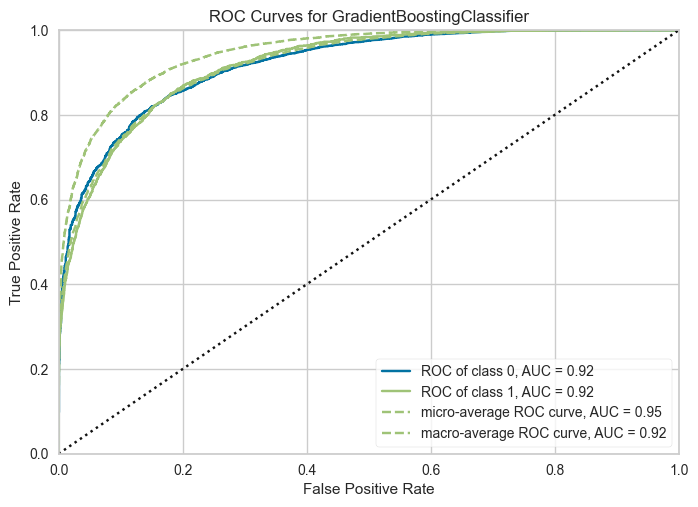

In [ ]:
# Best model graph
s.plot_model(best, plot = 'auc')

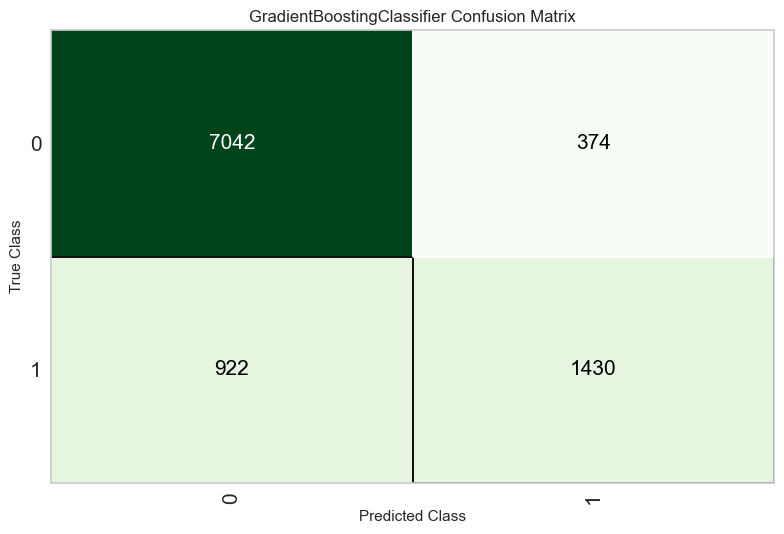

In [ ]:
# Confusion matrix
s.plot_model(best, plot = 'confusion_matrix')

In [ ]:
# Prediction of the best model
s.predict_model(best)

In [ ]:
# Apply the model to the input data and generate predictions
predictions = s.predict_model(best, data=df)
predictions.head()